# VQ-VAE Test

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/Shareddrives/Colab/Lionroket/VQ-VAE

/content/drive/Shareddrives/Colab/Lionroket/VQ-VAE


In [3]:
%%bash
pip install einops wandb pytorch-lightning adamp omegaconf umap-learn -q
wandb online

W&B online, running your script from this directory will now sync to the cloud.


## Imports

In [4]:
import torch
import numpy as np
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import CIFAR10
from torchvision import transforms
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
import wandb
from adamp import AdamP
from omegaconf import OmegaConf
import yaml
import os, sys
from einops import rearrange, reduce, asnumpy, parse_shape
from einops.layers.torch import Rearrange, Reduce
#import umap
from Module.DataModule import CIFAR10_DataModule

## Data

In [5]:
cifar = CIFAR10_DataModule()
cifar.prepare_data()
cifar.setup()
cifar_train_variance = cifar.get_cifar_train_variance()

Files already downloaded and verified
Files already downloaded and verified


## Test

In [ ]:
from glob import glob
import os
ckpt = glob("result/ckpt/*.ckpt")
ckpt.sort(key=os.path.getmtime)
print(ckpt)

result/ckpt/Cifar10_VQ-VAE_epoch=031-val_loss=0.110-reconstructin_loss=0.059-codebook_loss=0.041-commitment_loss=0.041.ckpt


In [ ]:
from Module.VQVAE import VQVAE
model_test = VQVAE.load_from_checkpoint(ckpt[-1]) # Newist idx: -1

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'list'>
313
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'codebook_loss': 0.04048769176006317,
 'commitment_loss': 0.04048769176006317,
 'reconstructin_loss': 0.05801448971033096,
 'test_loss': 0.10862413048744202}
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  f"DataModule.{name} has already been called, so it will not be called again. "


[{'codebook_loss': 0.04048769176006317,
  'commitment_loss': 0.04048769176006317,
  'reconstructin_loss': 0.05801448971033096,
  'test_loss': 0.10862413048744202}]

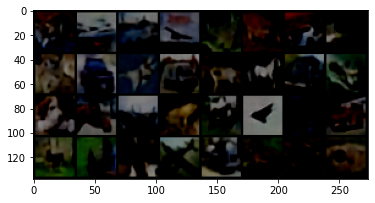

In [ ]:
trainer = pl.Trainer(gpus=-1)
trainer.test(model_test, datamodule=cifar)